In [136]:
import pandas as pd
import seaborn as sns

pd.set_option('display.max_rows', None)

# Penguins dataset

* Get data from csv
* Remove missing values
* Seperate target
* Feature selection
* Correlation matrix
* One-hot Encode categorial features
* Split train - test
* Scaling

### Read data

In [3]:
filename = '../Opdrachten/datasets/penguins.csv'

In [ ]:
df = pd.read_csv(filename)

### EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [7]:
df.describe()

,rowid,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,342.000000,342.000000,342.000000,342.000000,344.000000
mean,172.500000,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,99.448479,5.459584,1.974793,14.061714,801.954536,0.818356
min,1.000000,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,86.750000,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,172.500000,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,258.250000,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,344.000000,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [6]:
df['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [8]:
df['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [9]:
df['sex'].value_counts()

sex
male      168
female    165
Name: count, dtype: int64

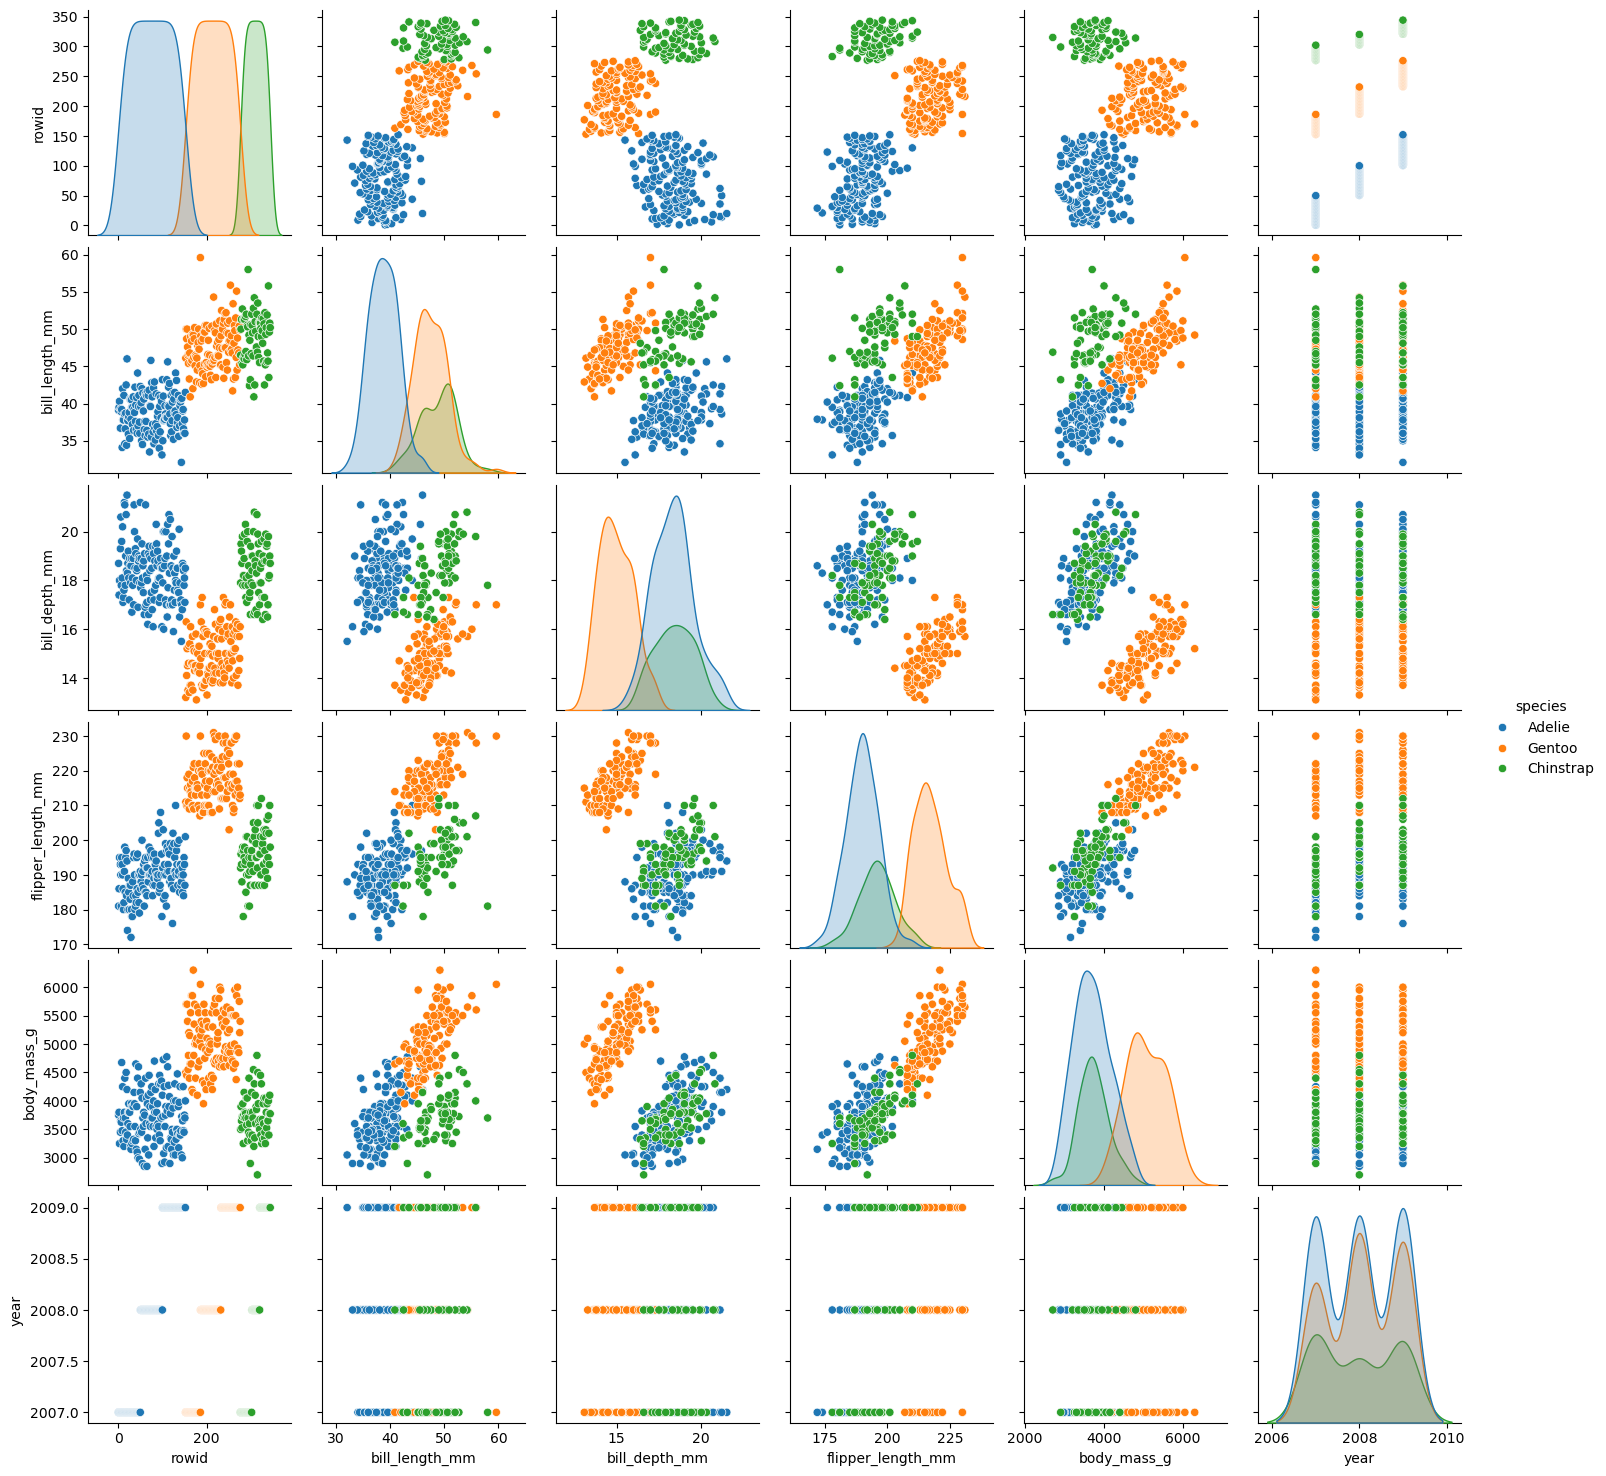

In [19]:
markers = df['sex'].replace({'male':'+', 'female':'o'})
sns.pairplot(df, hue='species')

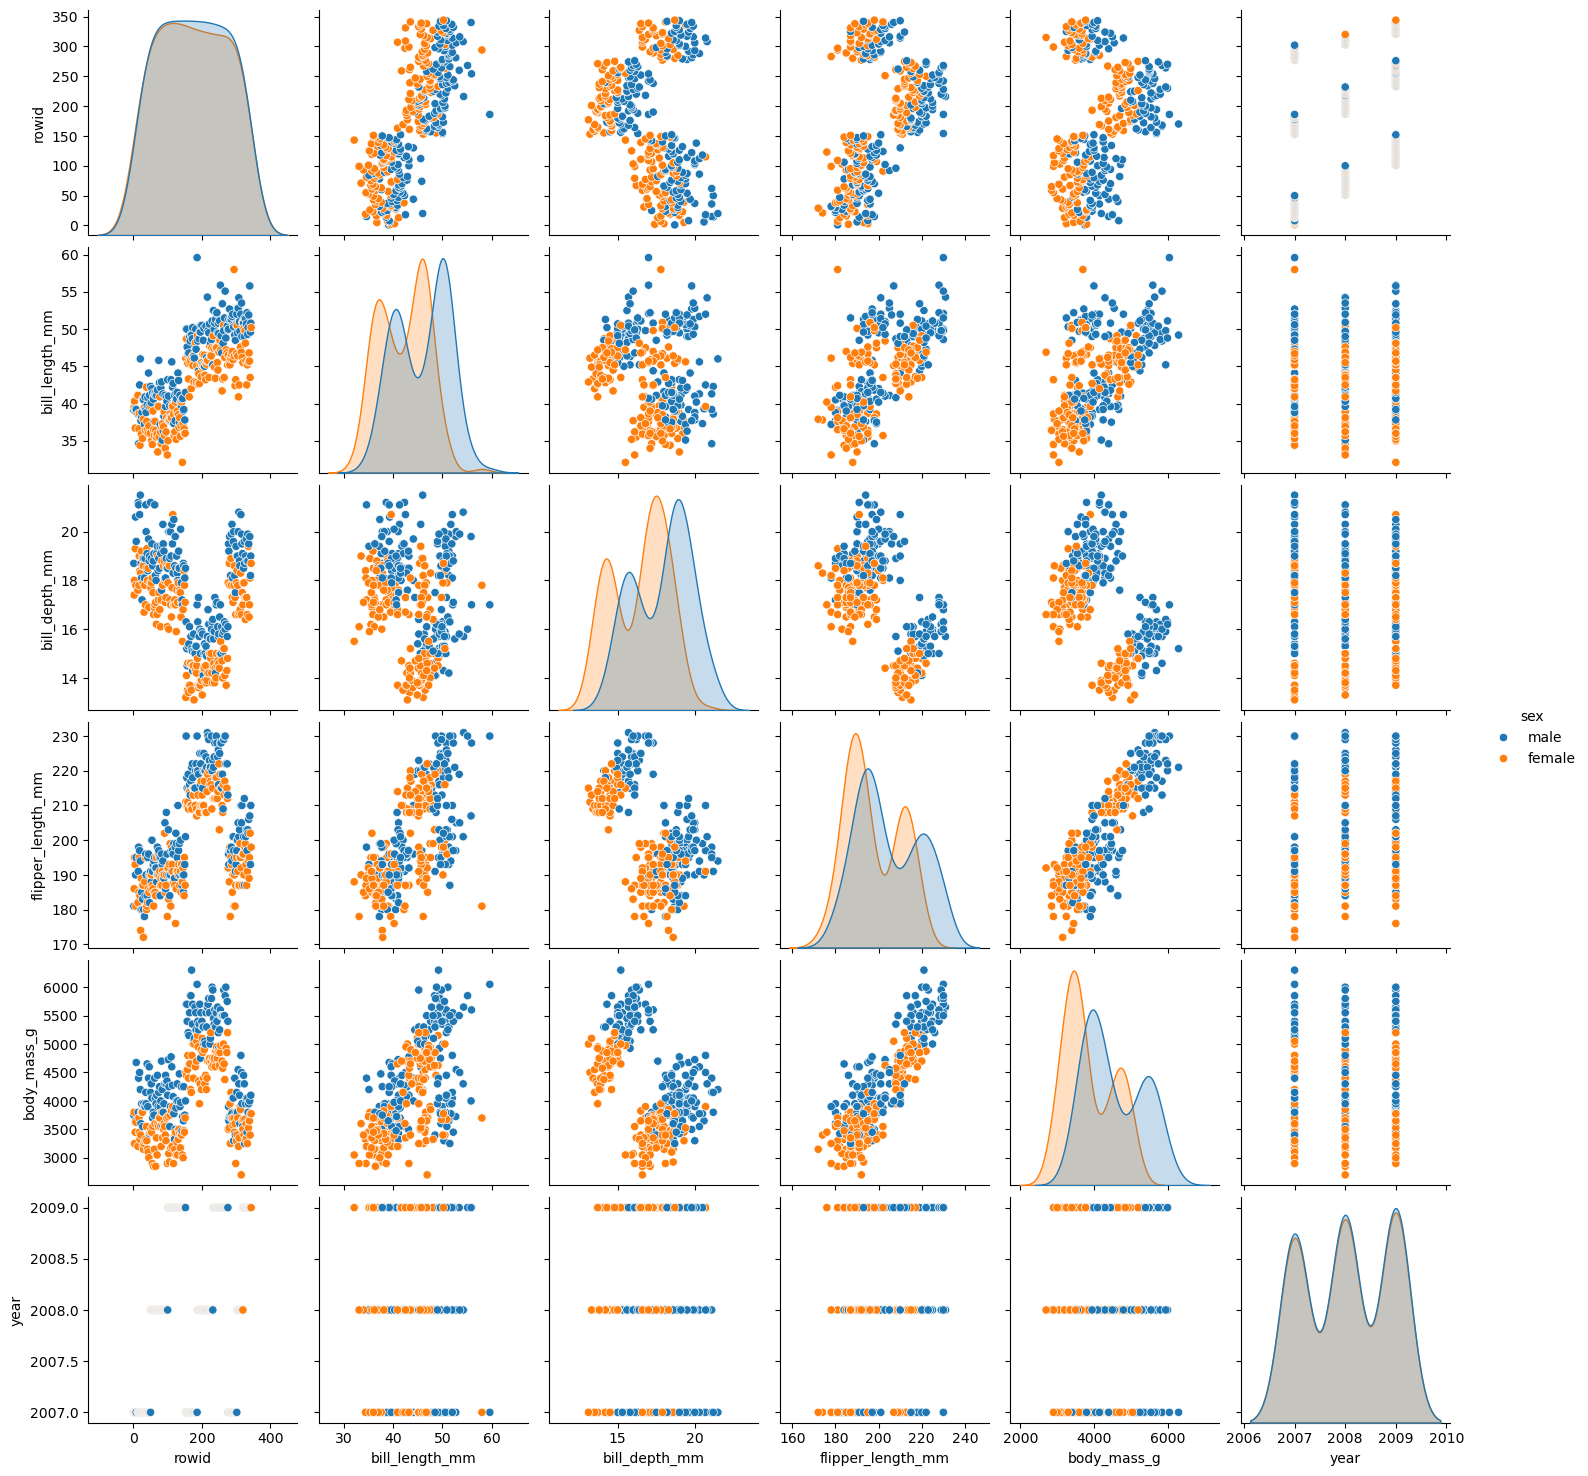

In [21]:
sns.pairplot(df, hue='sex')

### Remove missing values

In [47]:
df.dropna(inplace=True)

### Specify target and features

In [95]:
target_name = 'sex'
feature_names = ['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

df_target = df[[target_name]]
df_features = df[feature_names]

print('Target', df_target.shape)
print('Features', df_features.shape)

Target (333, 1)
Features (333, 6)


### Correlation matrix

In [119]:
corr = df_features.select_dtypes('float').corr()
corr.style.background_gradient(cmap='coolwarm', vmin=-1.0, vmax=1.0)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


### One-hot Encoding of Categorial features

In [103]:
df_features_encoded = pd.get_dummies(df_features, dtype=int, drop_first=True)
df_features_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bill_length_mm     333 non-null    float64
 1   bill_depth_mm      333 non-null    float64
 2   flipper_length_mm  333 non-null    float64
 3   body_mass_g        333 non-null    float64
 4   species_Chinstrap  333 non-null    int64  
 5   species_Gentoo     333 non-null    int64  
 6   island_Dream       333 non-null    int64  
 7   island_Torgersen   333 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 23.4 KB


In [104]:
df_features_encoded

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen
0,39.1,18.7,181.0,3750.0,0,0,0,1
1,39.5,17.4,186.0,3800.0,0,0,0,1
2,40.3,18.0,195.0,3250.0,0,0,0,1
4,36.7,19.3,193.0,3450.0,0,0,0,1
5,39.3,20.6,190.0,3650.0,0,0,0,1
...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,1,0,1,0
340,43.5,18.1,202.0,3400.0,1,0,1,0
341,49.6,18.2,193.0,3775.0,1,0,1,0
342,50.8,19.0,210.0,4100.0,1,0,1,0


### Split Train Test

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
df_features_train, df_features_test, df_target_train, df_target_test = \
    train_test_split(df_features_encoded, df_target, test_size=0.3)

print('Train target', df_target_train.shape)
print('Train features', df_features_train.shape)
print('Test target', df_target_test.shape)
print('Test features', df_features_test.shape)

Train target (233, 1)
Train features (233, 8)
Test target (100, 1)
Test features (100, 8)


### Scaling

In [107]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [108]:
scaler = MinMaxScaler()

scaler.fit(df_features_train)

X_train_scaled = scaler.transform(df_features_train)
X_test_scaled = scaler.transform(df_features_test)
                                       
df_features_train_scaled = pd.DataFrame(X_train_scaled, 
                                        columns = df_features_train.columns,
                                        index = df_features_train.index)

df_features_test_scaled = pd.DataFrame(X_test_scaled, 
                                       columns = df_features_test.columns,
                                       index = df_features_test.index)

In [109]:
df_features_train_scaled

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen
81,0.392727,0.555556,0.385965,0.555556,0.0,0.0,0.0,1.0
67,0.327273,0.740741,0.245614,0.388889,0.0,0.0,0.0,0.0
151,0.341818,0.666667,0.473684,0.361111,0.0,0.0,1.0,0.0
156,0.563636,0.172840,0.719298,0.750000,0.0,1.0,0.0,0.0
130,0.232727,0.592593,0.280702,0.173611,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
22,0.138182,0.753086,0.263158,0.305556,0.0,0.0,0.0,0.0
74,0.123636,0.543210,0.280702,0.277778,0.0,0.0,0.0,1.0
136,0.127273,0.543210,0.298246,0.131944,0.0,0.0,1.0,0.0
60,0.130909,0.469136,0.192982,0.125000,0.0,0.0,0.0,0.0


In [110]:
df_target_train

,sex
81,male
67,male
151,male
156,male
130,female
...,...
22,female
74,female
136,female
60,female


## Classification

In [159]:
from sklearn.metrics import precision_recall_fscore_support

In [147]:
results = {}    # key: alogorithm, value dict: accuracy

### K-Nearest Neighbor

In [120]:
from sklearn.neighbors import KNeighborsClassifier

In [162]:
k =7

classifier = KNeighborsClassifier(n_neighbors=k)

classifier.fit(df_features_train_scaled.values, df_target_train.values.ravel())

predictions = classifier.predict(df_features_test_scaled.values)

df_target_test[f'{k}NN predicted'] = predictions
df_target_test[f'{k}NN correct'] = df_target_test[target_name] == predictions

n_total, _ = df_target_test.shape
n_correct = (df_target_test[target_name] == predictions).sum()

print(f'{n_correct} predictions out of {n_total}')

accuracy = n_correct / n_total
precision, recall, fscore, *_ = precision_recall_fscore_support(df_target_test[target_name], predictions)

print(f'Accuracy = {accuracy}')
print(f'Precision = {precision}')
print(f'Recall = {recall}')
print(f'F1 score = {fscore}')

results[f'{k}NN'] = {'accuracy': float(accuracy)}

89 predictions out of 100
Accuracy = 0.89
Precision = [0.87037037 0.91304348]
Recall = [0.92156863 0.85714286]
F1 score = [0.8952381  0.88421053]


In [157]:
results

{'5NN': {'accuracy': 0.88},
 '3NN': {'accuracy': 0.89},
 '7NN': {'accuracy': 0.89}}

### Naive Bayes

In [163]:
from sklearn.naive_bayes import GaussianNB

In [164]:
classifier = GaussianNB()

name = 'NB'

classifier.fit(df_features_train_scaled.values, df_target_train.values.ravel())

predictions = classifier.predict(df_features_test_scaled.values)

df_target_test[f'{name} predicted'] = predictions
df_target_test[f'{name} correct'] = df_target_test[target_name] == predictions

n_total, _ = df_target_test.shape
n_correct = (df_target_test[target_name] == predictions).sum()

print(f'{n_correct} predictions out of {n_total}')

accuracy = n_correct / n_total
precision, recall, fscore, *_ = precision_recall_fscore_support(df_target_test[target_name], predictions)

print(f'Accuracy = {accuracy}')
print(f'Precision = {precision}')
print(f'Recall = {recall}')
print(f'F1 score = {fscore}')

results[name] = {'accuracy': float(accuracy)}

76 predictions out of 100
Accuracy = 0.76
Precision = [0.72881356 0.80487805]
Recall = [0.84313725 0.67346939]
F1 score = [0.78181818 0.73333333]


In [165]:
results

{'5NN': {'accuracy': 0.88},
 '3NN': {'accuracy': 0.89},
 '7NN': {'accuracy': 0.89},
 'NB': {'accuracy': 0.76}}

### Decision Tree

In [167]:
from sklearn.tree import DecisionTreeClassifier

In [175]:
classifier = DecisionTreeClassifier(max_depth = 4)

name = 'DT'

classifier.fit(df_features_train_scaled.values, df_target_train.values.ravel())

predictions = classifier.predict(df_features_test_scaled.values)

df_target_test[f'{name} predicted'] = predictions
df_target_test[f'{name} correct'] = df_target_test[target_name] == predictions

n_total, _ = df_target_test.shape
n_correct = (df_target_test[target_name] == predictions).sum()

print(f'{n_correct} predictions out of {n_total}')

accuracy = n_correct / n_total
precision, recall, fscore, *_ = precision_recall_fscore_support(df_target_test[target_name], predictions)

print(f'Accuracy = {accuracy}')
print(f'Precision = {precision}')
print(f'Recall = {recall}')
print(f'F1 score = {fscore}')

results[name] = {'accuracy': float(accuracy)}

91 predictions out of 100
Accuracy = 0.91
Precision = [0.9375     0.88461538]
Recall = [0.88235294 0.93877551]
F1 score = [0.90909091 0.91089109]


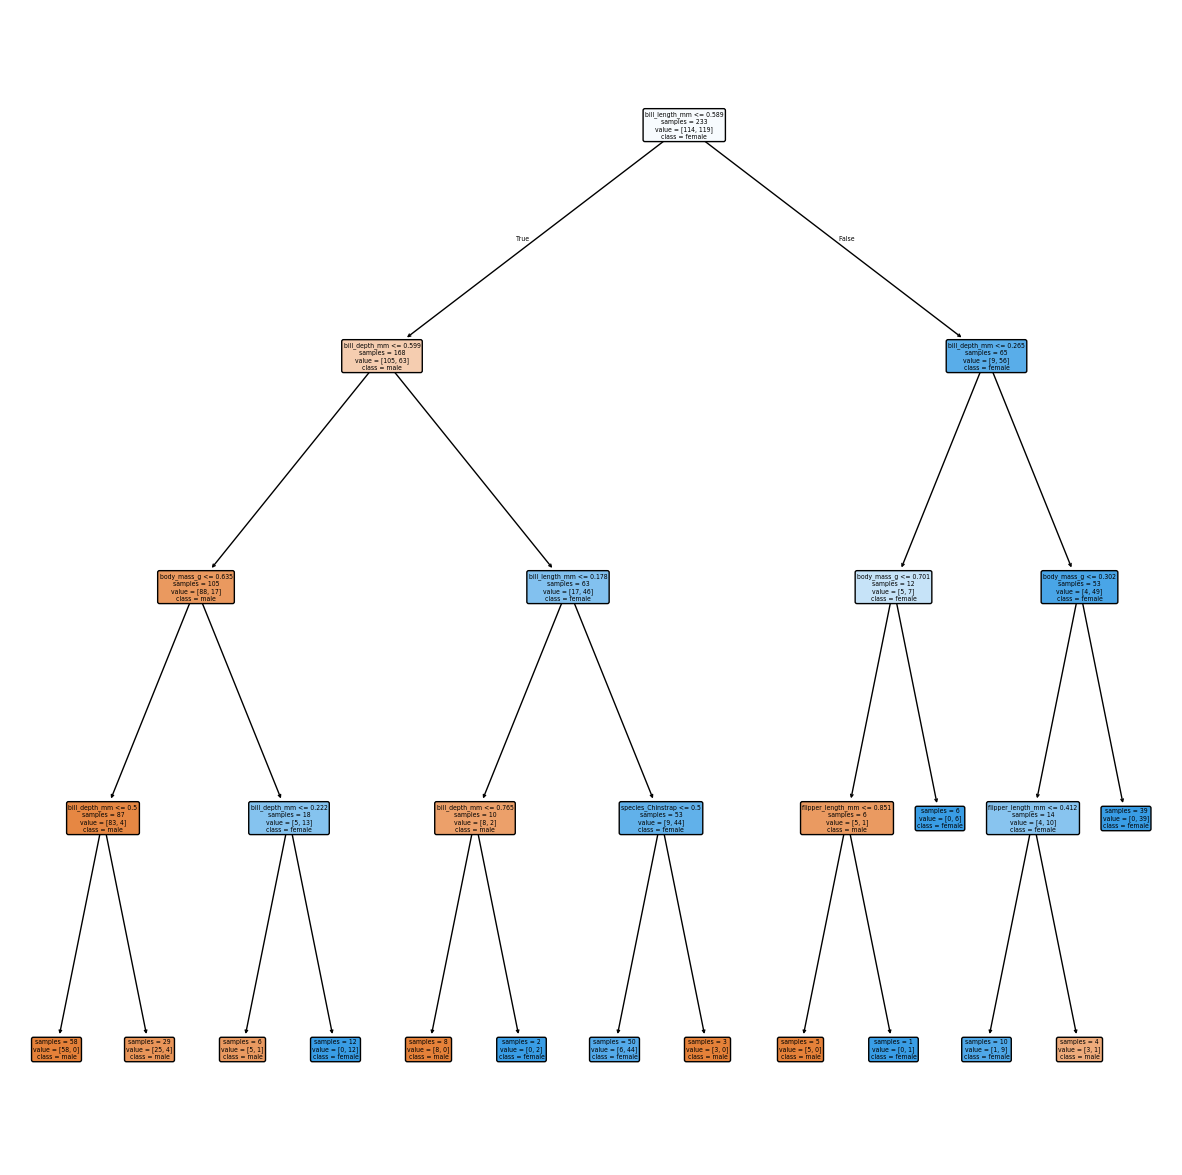

In [176]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize = (15,15))

tree.plot_tree(classifier, 
               feature_names = list(df_features_test.columns),
               class_names = list(df_target_test[target_name].unique()),
               filled = True,
               rounded = True, 
               impurity = False)

plt.show()

In [177]:
print(tree.export_text(classifier, 
                       feature_names=list(df_features_test.columns)))

|--- bill_length_mm <= 0.59
|   |--- bill_depth_mm <= 0.60
|   |   |--- body_mass_g <= 0.64
|   |   |   |--- bill_depth_mm <= 0.50
|   |   |   |   |--- class: female
|   |   |   |--- bill_depth_mm >  0.50
|   |   |   |   |--- class: female
|   |   |--- body_mass_g >  0.64
|   |   |   |--- bill_depth_mm <= 0.22
|   |   |   |   |--- class: female
|   |   |   |--- bill_depth_mm >  0.22
|   |   |   |   |--- class: male
|   |--- bill_depth_mm >  0.60
|   |   |--- bill_length_mm <= 0.18
|   |   |   |--- bill_depth_mm <= 0.77
|   |   |   |   |--- class: female
|   |   |   |--- bill_depth_mm >  0.77
|   |   |   |   |--- class: male
|   |   |--- bill_length_mm >  0.18
|   |   |   |--- species_Chinstrap <= 0.50
|   |   |   |   |--- class: male
|   |   |   |--- species_Chinstrap >  0.50
|   |   |   |   |--- class: female
|--- bill_length_mm >  0.59
|   |--- bill_depth_mm <= 0.27
|   |   |--- body_mass_g <= 0.70
|   |   |   |--- flipper_length_mm <= 0.85
|   |   |   |   |--- class: female
|   |   

### Random Forest

In [178]:
from sklearn.ensemble import RandomForestClassifier

In [179]:
classifier = RandomForestClassifier(n_estimators=100)

name = 'RF'

classifier.fit(df_features_train_scaled.values, df_target_train.values.ravel())

predictions = classifier.predict(df_features_test_scaled.values)

df_target_test[f'{name} predicted'] = predictions
df_target_test[f'{name} correct'] = df_target_test[target_name] == predictions

n_total, _ = df_target_test.shape
n_correct = (df_target_test[target_name] == predictions).sum()

print(f'{n_correct} predictions out of {n_total}')

accuracy = n_correct / n_total
precision, recall, fscore, *_ = precision_recall_fscore_support(df_target_test[target_name], predictions)

print(f'Accuracy = {accuracy}')
print(f'Precision = {precision}')
print(f'Recall = {recall}')
print(f'F1 score = {fscore}')

results[name] = {'accuracy': float(accuracy)}

90 predictions out of 100
Accuracy = 0.9
Precision = [0.88679245 0.91489362]
Recall = [0.92156863 0.87755102]
F1 score = [0.90384615 0.89583333]


### Support Vector Machine

In [180]:
from sklearn.svm import SVC

In [182]:
classifier = SVC(kernel='rbf')

name = 'SVM'

classifier.fit(df_features_train_scaled.values, df_target_train.values.ravel())

predictions = classifier.predict(df_features_test_scaled.values)

df_target_test[f'{name} predicted'] = predictions
df_target_test[f'{name} correct'] = df_target_test[target_name] == predictions

n_total, _ = df_target_test.shape
n_correct = (df_target_test[target_name] == predictions).sum()

print(f'{n_correct} predictions out of {n_total}')

accuracy = n_correct / n_total
precision, recall, fscore, *_ = precision_recall_fscore_support(df_target_test[target_name], predictions)

print(f'Accuracy = {accuracy}')
print(f'Precision = {precision}')
print(f'Recall = {recall}')
print(f'F1 score = {fscore}')

results[name] = {'accuracy': float(accuracy)}

93 predictions out of 100
Accuracy = 0.93
Precision = [0.92307692 0.9375    ]
Recall = [0.94117647 0.91836735]
F1 score = [0.93203883 0.92783505]


### Logistic Regression

In [183]:
from sklearn.linear_model import LogisticRegression

In [184]:
classifier = LogisticRegression()

name = 'LR'

classifier.fit(df_features_train_scaled.values, df_target_train.values.ravel())

predictions = classifier.predict(df_features_test_scaled.values)

df_target_test[f'{name} predicted'] = predictions
df_target_test[f'{name} correct'] = df_target_test[target_name] == predictions

n_total, _ = df_target_test.shape
n_correct = (df_target_test[target_name] == predictions).sum()

print(f'{n_correct} predictions out of {n_total}')

accuracy = n_correct / n_total
precision, recall, fscore, *_ = precision_recall_fscore_support(df_target_test[target_name], predictions)

print(f'Accuracy = {accuracy}')
print(f'Precision = {precision}')
print(f'Recall = {recall}')
print(f'F1 score = {fscore}')

results[name] = {'accuracy': float(accuracy)}

90 predictions out of 100
Accuracy = 0.9
Precision = [0.91836735 0.88235294]
Recall = [0.88235294 0.91836735]
F1 score = [0.9 0.9]


### Neural Network

In [185]:
from sklearn.neural_network import MLPClassifier

In [187]:
classifier = MLPClassifier(max_iter=1000)

name = 'NN'

classifier.fit(df_features_train_scaled.values, df_target_train.values.ravel())

predictions = classifier.predict(df_features_test_scaled.values)

df_target_test[f'{name} predicted'] = predictions
df_target_test[f'{name} correct'] = df_target_test[target_name] == predictions

n_total, _ = df_target_test.shape
n_correct = (df_target_test[target_name] == predictions).sum()

print(f'{n_correct} predictions out of {n_total}')

accuracy = n_correct / n_total
precision, recall, fscore, *_ = precision_recall_fscore_support(df_target_test[target_name], predictions)

print(f'Accuracy = {accuracy}')
print(f'Precision = {precision}')
print(f'Recall = {recall}')
print(f'F1 score = {fscore}')

results[name] = {'accuracy': float(accuracy)}

95 predictions out of 100
Accuracy = 0.95
Precision = [0.94230769 0.95833333]
Recall = [0.96078431 0.93877551]
F1 score = [0.95145631 0.94845361]


In [188]:
results

{'5NN': {'accuracy': 0.88},
 '3NN': {'accuracy': 0.89},
 '7NN': {'accuracy': 0.89},
 'NB': {'accuracy': 0.76},
 'DT': {'accuracy': 0.91},
 'RF': {'accuracy': 0.9},
 'SVM': {'accuracy': 0.93},
 'LR': {'accuracy': 0.9},
 'NN': {'accuracy': 0.95}}

In [189]:
classifier

MLPClassifier(max_iter=1000)